In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1) Data loading and first exploration

In [70]:
import numpy as np
import pandas as pd

In [71]:
train = pd.read_csv("/content/drive/MyDrive/Kaggle/4_Multiclass obesity risk prediction/train.csv").set_index("id")
test = pd.read_csv("/content/drive/MyDrive/Kaggle/4_Multiclass obesity risk prediction/test.csv").set_index("id")

In [72]:
train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [73]:
train.head(5).T

id,0,1,2,3,4
Gender,Male,Female,Female,Female,Male
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,Sometimes,Frequently,Sometimes,Sometimes,Sometimes
SMOKE,no,no,no,no,no


In [74]:
train.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# 'Gender', 'Age', 'Height', 'Weight' are physical attributes
# 'family_history_with_overweight' points out to familiarity with obesity
# FAVC = Frequent consumption of high caloric food
# FCVC = Frequency of consumption of vegetables
# NCP = Number of main meals
# CAEC = Consumption of food between meals
# SMOKE = tobacco usage
# CH20 = Consumption of water daily
# SCC = Calories consumption monitoring
# FAF = Physical activity frequency
# TUE = Time using technology devices
# CALC = Consumption of alcohol
# MTRANS = Transportation used

2) Target analysis

In [77]:
target = train["NObeyesdad"]
train = train.drop("NObeyesdad", axis="columns")

In [78]:
target.value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

In [79]:
target.value_counts() / len(target)

Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: NObeyesdad, dtype: float64

<ipython-input-80-de7e1b44ccc8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=target, order=sorted_labels, palette=color_list)
<ipython-input-80-de7e1b44ccc8>:13: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=target, order=sorted_labels, palette=color_list)
<ipython-input-80-de7e1b44ccc8>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='right', fontsize=8)


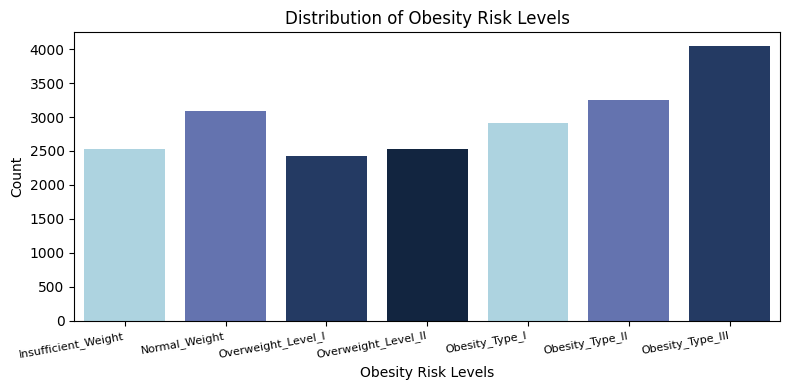

In [80]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0B2447"]
cmap_custom = ListedColormap(color_list)

sorted_labels = ['Insufficient_Weight', 'Normal_Weight',
 'Overweight_Level_I', 'Overweight_Level_II',
 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

plt.figure(figsize=(8, 4))
ax = sns.countplot(x=target, order=sorted_labels, palette=color_list)

plt.title('Distribution of Obesity Risk Levels')
plt.xlabel('Obesity Risk Levels')
plt.ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, sorted_labels):
        self.classes_ = sorted_labels
        self.label_to_numeric_mapping = None

    def fit(self, y):
        self.label_to_numeric_mapping = {label: numeric for numeric, label in enumerate(self.classes_)}
        return self

    def transform(self, y):
        if self.label_to_numeric_mapping is None:
            raise ValueError("fit method must be called before transform")
        return y.map(self.label_to_numeric_mapping)

    def inverse_transform(self, y):
        if self.label_to_numeric_mapping is None:
            raise ValueError("fit method must be called before inverse_transform")
        return pd.Series(y).map({numeric: label for label, numeric in self.label_to_numeric_mapping.items()})

In [82]:
target_encoder = CustomLabelEncoder(sorted_labels)
target_encoder.fit(target)
target_numeric = target_encoder.transform(target)

In [83]:
target_numeric

id
0        3
1        1
2        0
3        6
4        3
        ..
20753    5
20754    0
20755    5
20756    3
20757    5
Name: NObeyesdad, Length: 20758, dtype: int64

Using our enconder, we can rever back from numeric to string anytime:

In [84]:
target_encoder.inverse_transform(target_numeric)

id
0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

3) EDA and data preparation

In [85]:
train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [86]:
test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [87]:
train.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [88]:
categorical_features = train.columns[train.dtypes=="object"].tolist()
numeric_features = train.columns[train.dtypes!="object"].tolist()

In [89]:
train[categorical_features].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
dtype: int64

In [90]:
train[numeric_features].nunique()

Age       1703
Height    1833
Weight    1979
FCVC       934
NCP        689
CH2O      1506
FAF       1360
TUE       1297
dtype: int64

<ipython-input-91-af375f044e97>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


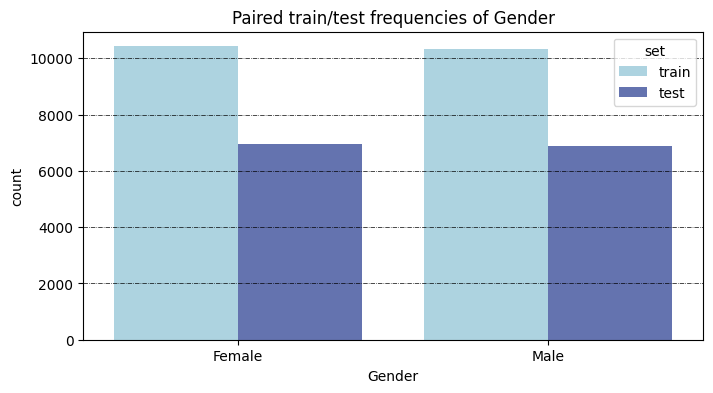

<ipython-input-91-af375f044e97>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


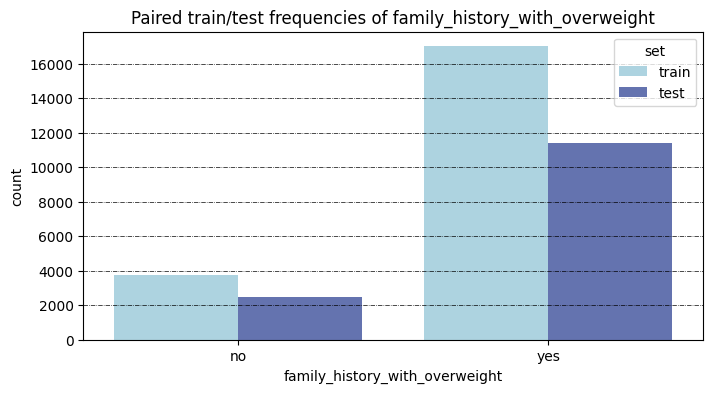

<ipython-input-91-af375f044e97>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


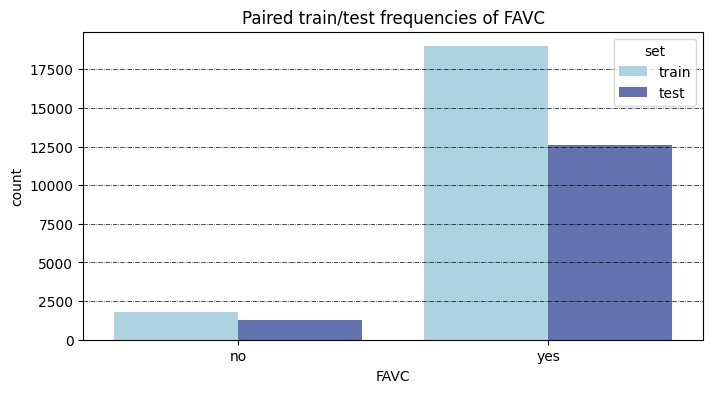

<ipython-input-91-af375f044e97>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


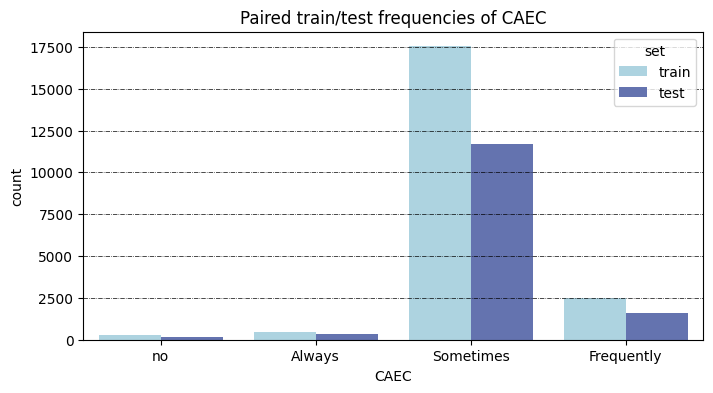

<ipython-input-91-af375f044e97>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


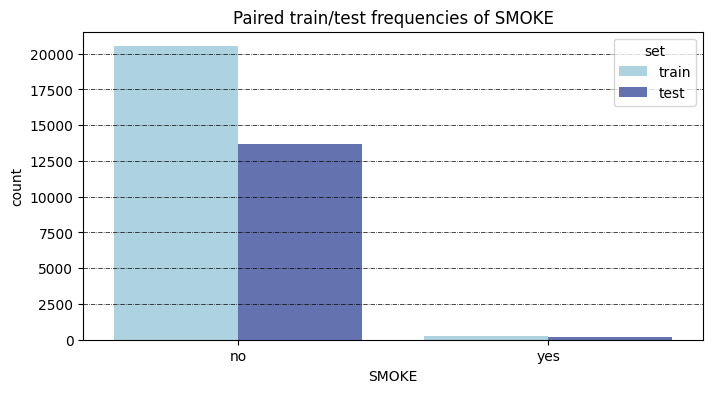

<ipython-input-91-af375f044e97>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


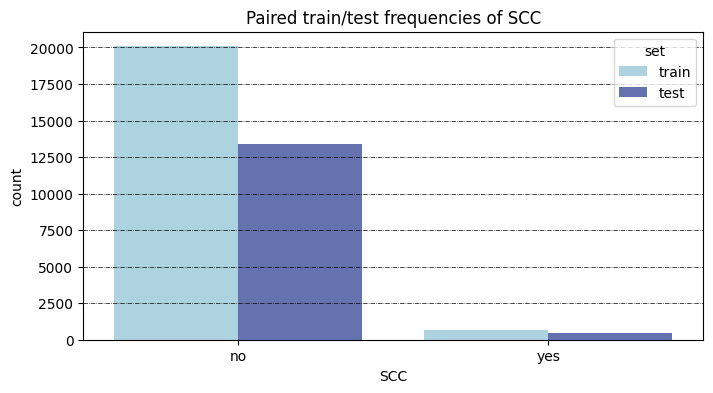

<ipython-input-91-af375f044e97>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


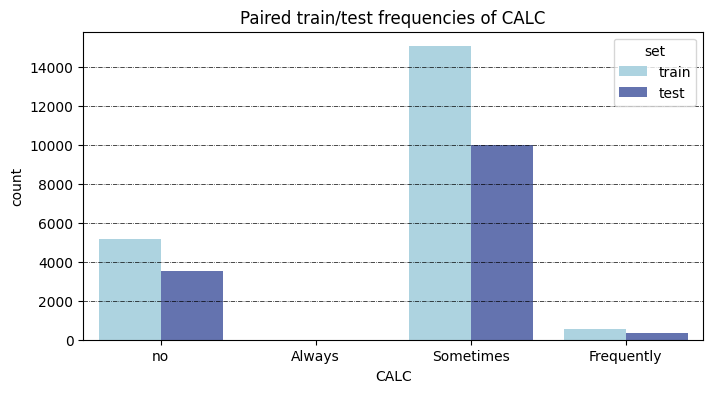

<ipython-input-91-af375f044e97>:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)


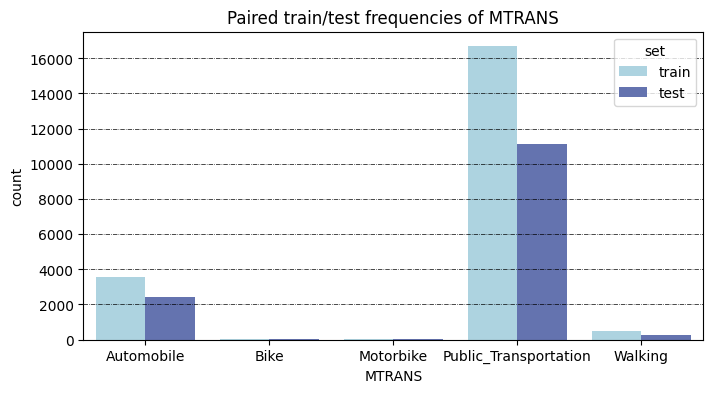

In [91]:
def plot_count_pairs(train, test, feature, hue="set", order=None, palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)
    plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
    ax.set_title(f"Paired train/test frequencies of {feature}")
    plt.show()

for feature in categorical_features:
    if feature in ["CAEC", "CALC"]:
        order = ["no", "Always", "Sometimes", "Frequently"]
    else:
        order = sorted(train[feature].unique())
    plot_count_pairs(train, test, feature=feature, order=order, palette=color_list)

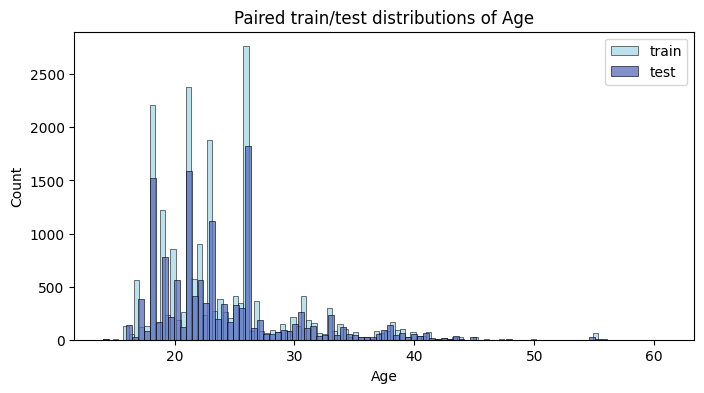

<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


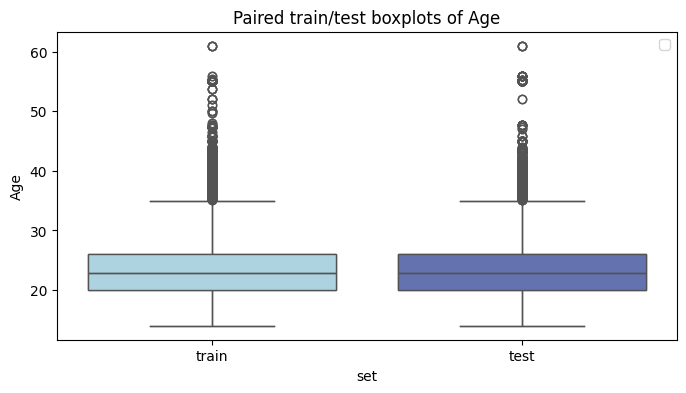

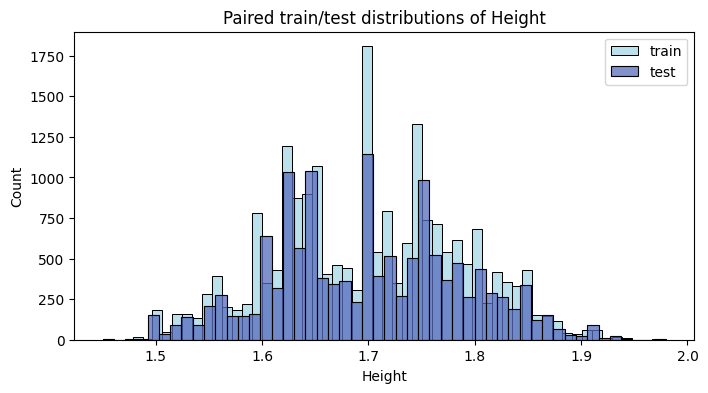

<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


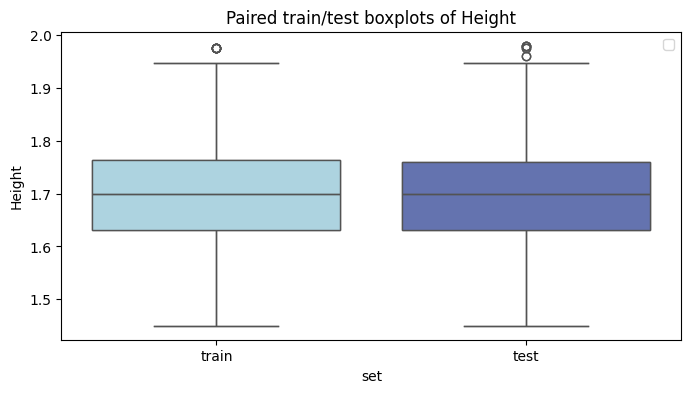

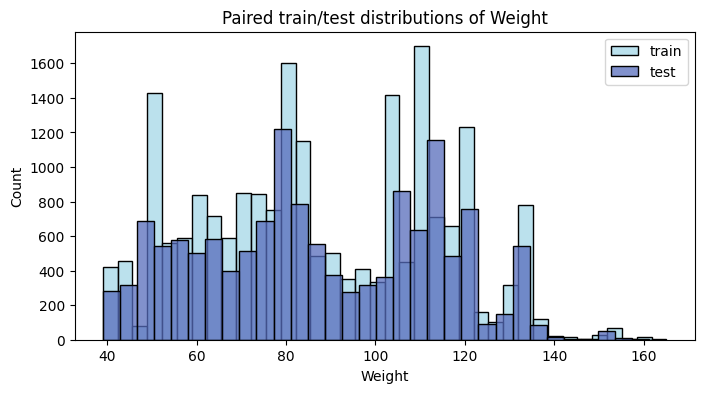

<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


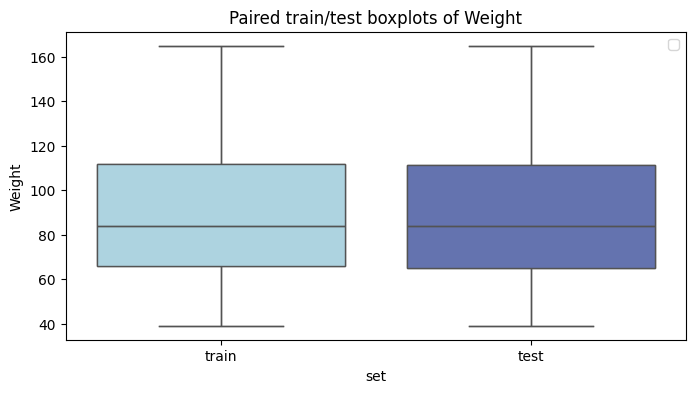

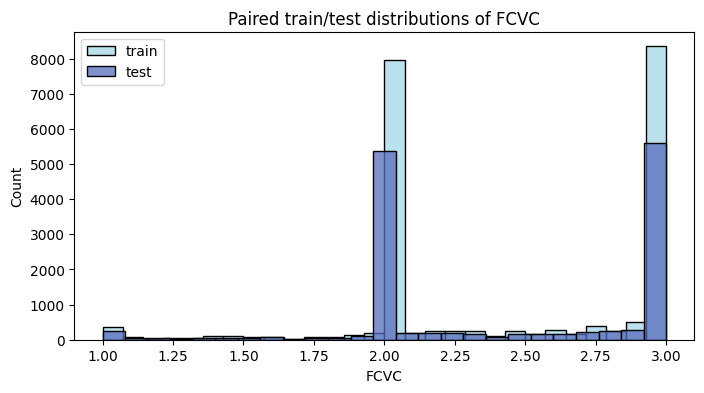

<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


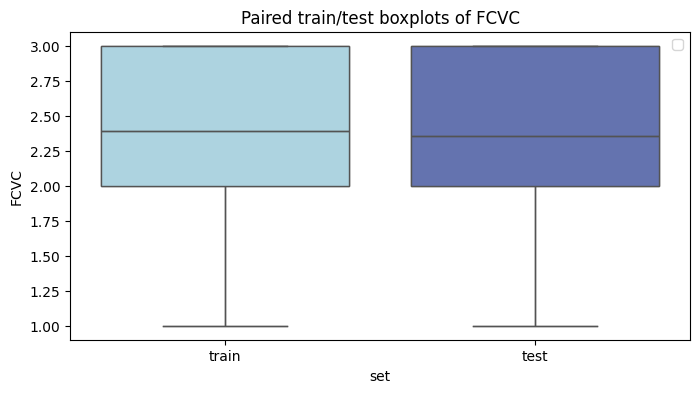

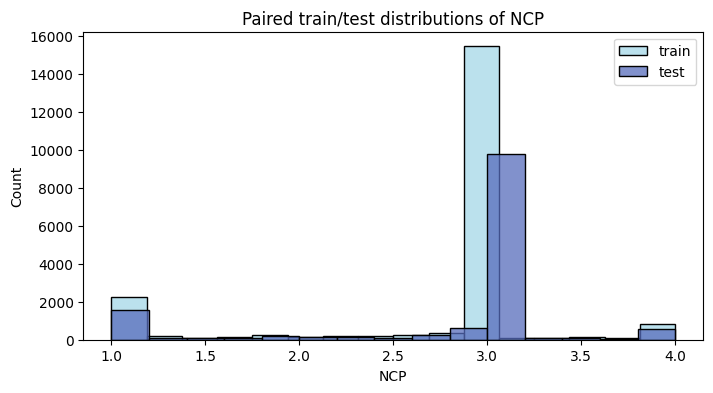

<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


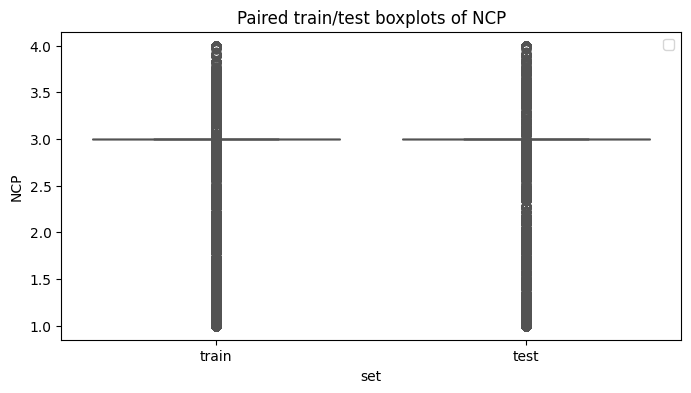

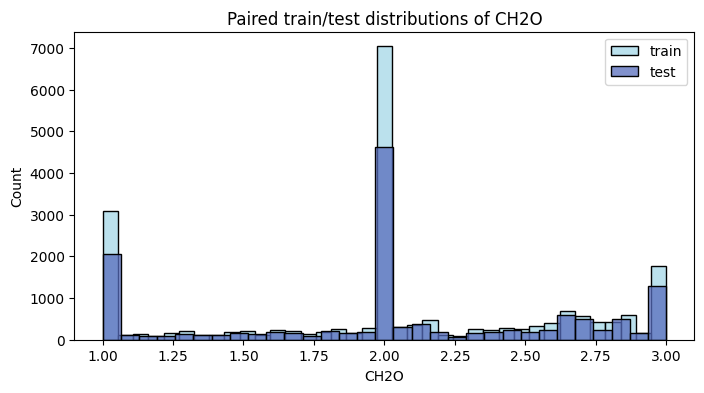

<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


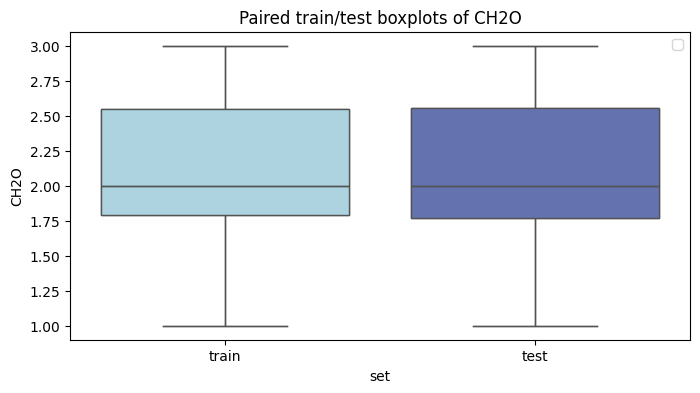

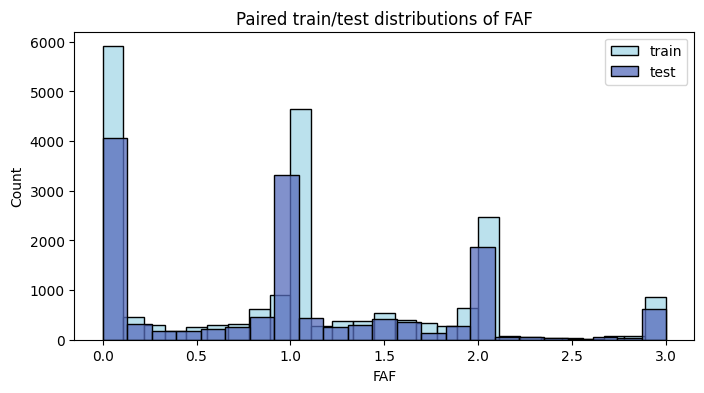

<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


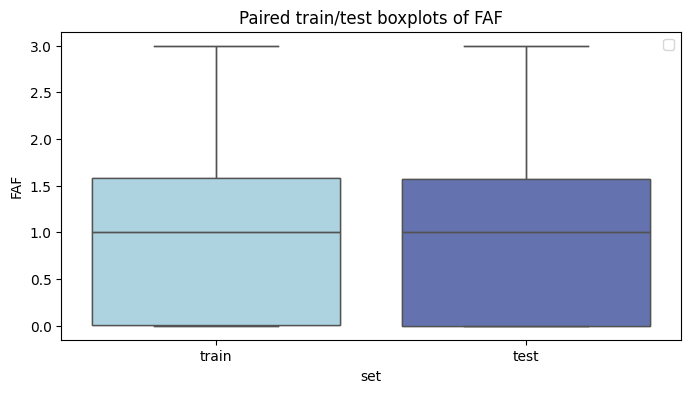

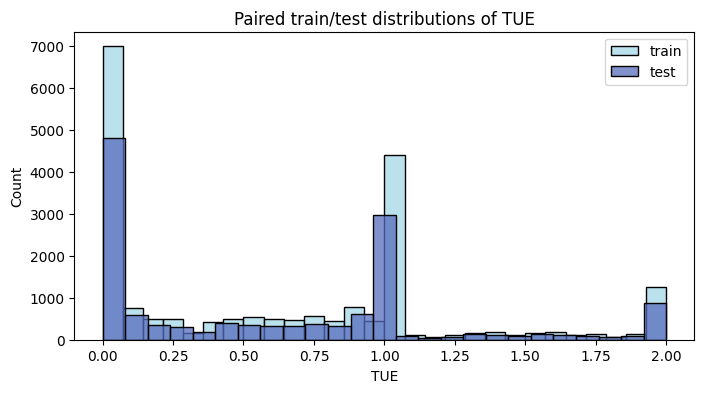

<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
<ipython-input-92-50fb0131e128>:30: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)


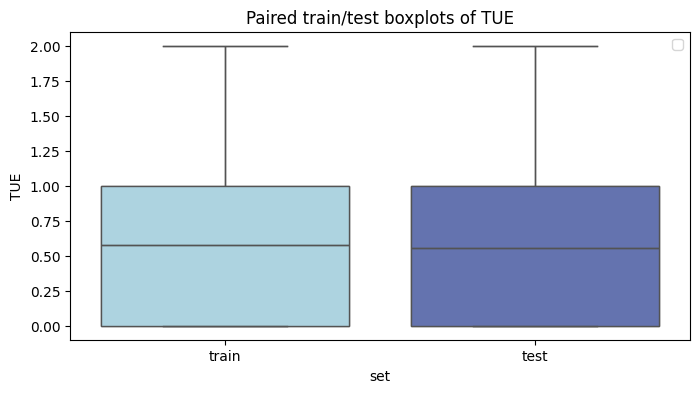

In [92]:
import warnings

def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            g = sns.histplot(selection, color=palette[i], ax=ax, label=s)
    ax.set_title(f"Paired train/test distributions of {feature}")
    g.legend()
    plt.show()

def plot_distribution_pairs_boxplot(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
    ax.set_title(f"Paired train/test boxplots of {feature}")
    g.legend()
    plt.show()

for feature in numeric_features:
    plot_distribution_pairs(train, test, feature, palette=color_list)
    plot_distribution_pairs_boxplot(train, test, feature, palette=color_list)

3.1) Categorical encoding

In [93]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(pd.concat([train[categorical_features], test[categorical_features]], axis=0))

train_encoded = encoder.transform(train[categorical_features])
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_features))

In [94]:
train_encoded_df.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
test_encoded = encoder.fit_transform(test[categorical_features])
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_features))

In [96]:
test_encoded_df.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [97]:
train_sum = train_encoded_df.sum(axis=0).astype(int)
test_sum = test_encoded_df.sum(axis=0).astype(int)

sum_df = pd.concat([train_sum, test_sum], axis=1, keys=['Train', 'Test'])
sum_df

,Train,Test
Gender_Female,10422,6965
Gender_Male,10336,6875
family_history_with_overweight_no,3744,2456
family_history_with_overweight_yes,17014,11384
FAVC_no,1776,1257
FAVC_yes,18982,12583
CAEC_Always,478,359
CAEC_Frequently,2472,1617
CAEC_Sometimes,17529,11689
CAEC_no,279,175


3.2) Adjusting Catrgorical features

In [98]:
combine_columns = ['CALC_Always', 'CALC_Frequently']

train_encoded_df['CALC_Always|Frequently'] = train_encoded_df[combine_columns].sum(axis=1)
test_encoded_df['CALC_Always|Frequently'] = test_encoded_df[combine_columns].sum(axis=1)

train_encoded_df = train_encoded_df.drop(columns=combine_columns).set_index(train.index)
test_encoded_df = test_encoded_df.drop(columns=combine_columns).set_index(test.index)

In [99]:
levels = {"Always": 3, "Frequently": 2, "Sometimes": 1, "no": 0}
train["CALC_ord"] = train["CALC"].map(levels)
test["CALC_ord"] = test["CALC"].map(levels)
train["CAEC_ord"] = train["CAEC"].map(levels)
test["CAEC_ord"] = test["CAEC"].map(levels)

In [100]:
train = pd.concat([train.drop(categorical_features, axis=1), train_encoded_df], axis=1)
test = pd.concat([test.drop(categorical_features, axis=1), test_encoded_df], axis=1)

In [101]:
train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC_ord,CAEC_ord,...,SCC_no,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Always|Frequently
id,,,,,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0,2,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [102]:
train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC_ord,CAEC_ord,...,SCC_no,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Always|Frequently
id,,,,,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0,2,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


3.3) Adversarial validation

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

X =  pd.concat([train, test], axis=0)
y = [0] * len(train) + [1] * len(test)

model = RandomForestClassifier(random_state=0)
cv_preds = cross_val_predict(model, X, y, cv=5, n_jobs=-1, method='predict_proba')

score = roc_auc_score(y_true=y, y_score=cv_preds[:,1])
print(f"roc-auc score: {score:0.3f}")

roc-auc score: 0.499


3.4) Feature engineering

At this point we try to create some smart feature engineering. As a first step we calculate the Body Mass Index using the 'Height' and 'Weight' features. BMI is often used as an indicator of obesity and it better represents the relationship between weight and height.

In [104]:
train['BMI'] = train['Weight'] / (train['Height'] ** 2)
test['BMI'] = test['Weight'] / (test['Height'] ** 2)

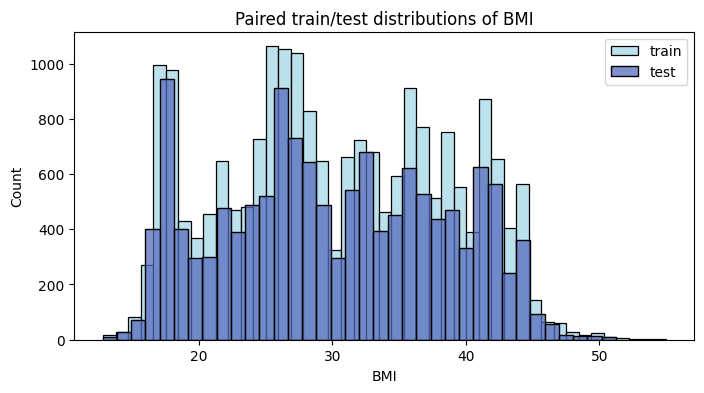

In [105]:
plot_distribution_pairs(train, test, feature="BMI", palette=color_list)

We then combine 'FAF' (Physical activity frequency) with 'TUE' (Time using technology devices) to create a feature representing the balance between physical activity and sedentary behavior.

In [106]:
train['Physical_Activity_Level'] = train['FAF'] - train['TUE']
test['Physical_Activity_Level'] = test['FAF'] - test['TUE']

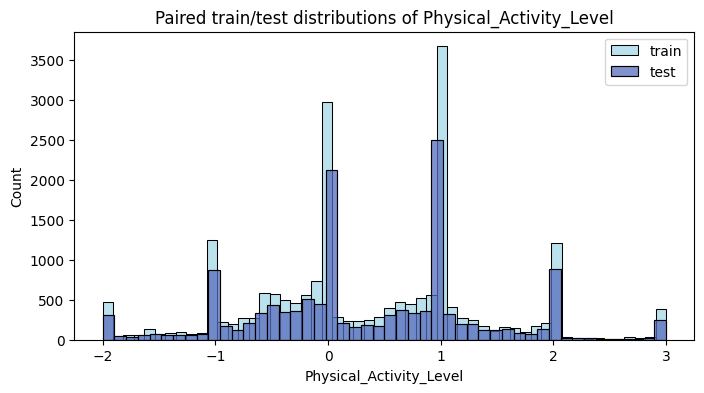

In [107]:
plot_distribution_pairs(train, test, feature="Physical_Activity_Level", palette=color_list)

Combine 'FCVC' (Frequency of consumption of vegetables) and 'NCP' (Number of main meals) to create a feature reflecting overall meal habits.

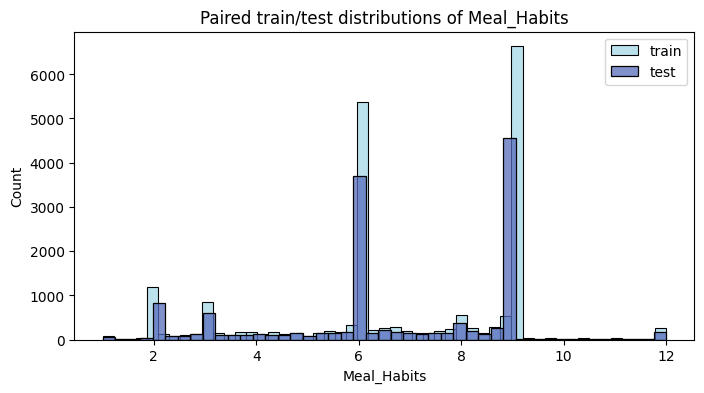

In [108]:
train['Meal_Habits'] = train['FCVC'] * train['NCP']
test['Meal_Habits'] = test['FCVC'] * test['NCP']
plot_distribution_pairs(train, test, feature="Meal_Habits", palette=color_list)

We also combine features like 'FCVC' (Frequency of consumption of vegetables) and 'FAVC' (Frequent consumption of high caloric food) to create a new feature representing overall nutrition habits.

In [109]:
(train['FAVC_yes'] - 2).unique

<bound method Series.unique of id
0       -1.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
        ... 
20753   -1.0
20754   -1.0
20755   -1.0
20756   -1.0
20757   -1.0
Name: FAVC_yes, Length: 20758, dtype: float64>

In [110]:
train['Healthy_Nutrition_Habits'] = train['FCVC'] / ( 2 * train['FAVC_no'] - 1)
test['Healthy_Nutrition_Habits'] = test['FCVC'] / ( 2 * test['FAVC_no'] - 1)

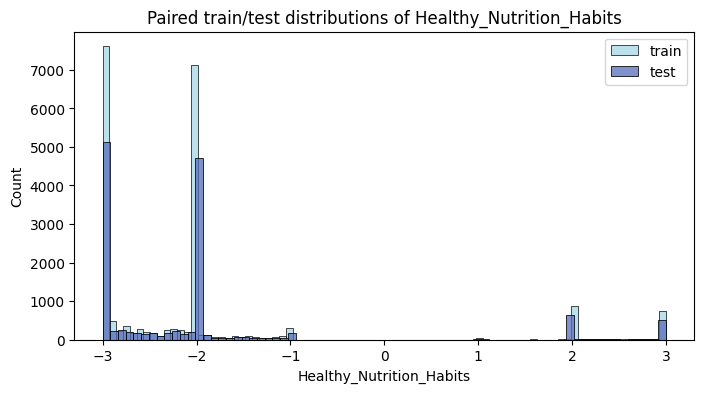

In [111]:
plot_distribution_pairs(train, test, feature="Healthy_Nutrition_Habits", palette=color_list)

We finally create a score based on the frequency of technology usage ('TUE') weighted by the age: essentially, it quantifies the average amount of time a person spends using technology per unit of their age

In [112]:
train['Tech_Usage_Score'] = train['TUE'] / train['Age']
test['Tech_Usage_Score'] = test['TUE'] / test['Age']

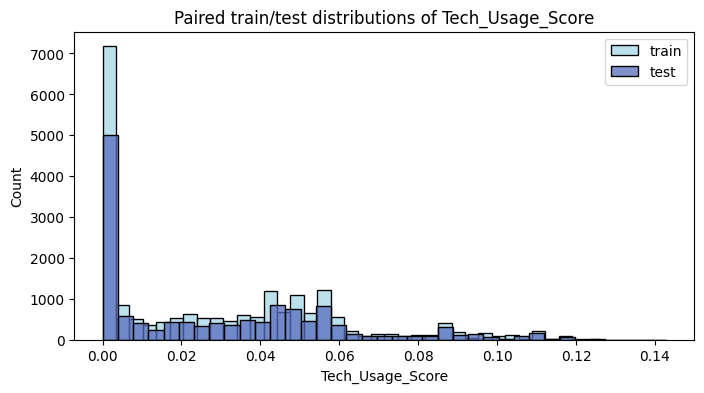

In [113]:
plot_distribution_pairs(train, test, feature="Tech_Usage_Score", palette=color_list)

In [114]:
train.to_csv("train.csv")
test.to_csv("test.csv")

In [115]:
pip install boruta

3.5) Feature Selection

In [120]:
np.int = np.int64
np.float = np.float64
np.bool = bool

from boruta import BorutaPy
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

# Note we use a group k-fold based on time
folds = 5
kf = StratifiedKFold(folds, shuffle=True, random_state=0)

selected_columns = list()

for k, (train_idx, val_idx) in enumerate(kf.split(train, target_numeric)):

    print(f"FOLD {k+1}/{folds}")
    xgb = XGBClassifier(booster='gbtree',
                        device = "cuda",
                        tree_method="hist",
                        objective='multi:softmax',  # 'multi:softmax' for multiclass classification
                        num_class=len(set(target_numeric)),  # Number of classes
                        verbosity=0)

    Feature_Selector = BorutaPy(xgb, n_estimators='auto', verbose=0, random_state=0)

    Feature_Selector.fit(X=train.iloc[train_idx, :].values,
                         y=target_numeric.iloc[train_idx].values)


    selected_columns.append(train.columns[Feature_Selector.support_].tolist())

    print(f"Selected features at fold {k+1} are: {selected_columns[-1]}")

final_selection = sorted({item for selection in selected_columns for item in selection})
print(final_selection)

FOLD 1/5


KeyboardInterrupt: 

In [ ]:
train = train[final_selection]
test = test[final_selection]

4) Modelling

In [122]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, shuffle=True, random_state=0)
cv_splits = cv.split(train, y=target_numeric)

In [ ]:
list(cv_splits)

[(array([    0,     1,     2, ..., 20755, 20756, 20757]),
  array([   15,    24,    27, ..., 20740, 20741, 20754])),
 (array([    2,     3,     4, ..., 20755, 20756, 20757]),
  array([    0,     1,     7, ..., 20748, 20750, 20752])),
 (array([    0,     1,     2, ..., 20754, 20756, 20757]),
  array([   10,    22,    23, ..., 20728, 20732, 20755])),
 (array([    0,     1,     2, ..., 20752, 20754, 20755]),
  array([    3,     4,     6, ..., 20753, 20756, 20757])),
 (array([    0,     1,     3, ..., 20755, 20756, 20757]),
  array([    2,     5,    14, ..., 20746, 20749, 20751]))]

In [ ]:

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score
from xgboost import XGBClassifier

4.1) First temptative models (hand tuning

In [ ]:
%%time

xgb = XGBClassifier(booster='gbtree',
                    device = "cpu",
                    tree_method="hist",
                    multi_strategy="multi_output_tree", # for multi-output trees
                    objective='multi:softmax',  # 'multi:softmax' for multiclass classification
                    num_class=len(set(target_numeric)),  # Number of classes
                    n_estimators=300,
                    max_depth=6,
                    verbosity=0)

cv_splits = cv.split(train, y=target_numeric)
scorer = make_scorer(accuracy_score)

cv_results = cross_validate(xgb, train, target_numeric, cv=cv_splits, scoring=scorer, return_train_score=False)

accuracy_mean = cv_results['test_score'].mean()
print(f'Cross-validated Accuracy: {accuracy_mean:.3f}')

Cross-validated Accuracy: 0.902
CPU times: user 2min 33s, sys: 470 ms, total: 2min 33s
Wall time: 1min 45s


In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import TPESampler

def objective(trial):

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear']),
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'gamma' : trial.suggest_float('gamma', 1e-9, 0.5),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 24),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 100.0, log=True),
    }

    params['objective'] = 'multi:softmax'
    params["device"] = "cuda"
    params["verbosity"] = 0

    if params['booster'] == 'gblinear':
        keys_to_remove = ["colsample_bytree", "max_depth", "min_child_weight", "subsample", "gamma", "grow_policy"]
        params = {key:value for key, value in params.items() if key not in keys_to_remove}
    else:
        params['tree_method'] = "hist"

    xgb = XGBClassifier(**params)
    cv_splits = cv.split(train, y=target_numeric)

    cv_scores = cross_validate(estimator=xgb,
                               X=train,
                               y=target_numeric,
                               scoring=scorer,
                               cv=cv_splits)

    cv_evaluation = np.mean(np.abs(cv_scores['test_score']))
    return cv_evaluation

sqlite_db = "sqlite:///sqlite.db"
study_name = "multi_class_prediction_of_obesity_risk"
study = optuna.create_study(storage=sqlite_db, study_name=study_name,
                            sampler=TPESampler(n_startup_trials=30, multivariate=True, seed=0),
                            direction="maximize", load_if_exists=True)

study.optimize(objective, n_trials=100)
print(study.best_value)
print(study.best_params)

/usr/local/lib/python3.10/dist-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-02-05 08:07:09,849] A new study created in RDB with name: multi_class_prediction_of_obesity_risk
[I 2024-02-05 08:08:42,169] Trial 0 finished with value: 0.7619715448003568 and parameters: {'booster': 'gblinear', 'grow_policy': 'depthwise', 'n_estimators': 481, 'learning_rate': 0.19578897201213002, 'gamma': 0.21879360619375904, 'subsample': 0.9242411005474558, 'colsample_bytree': 0.9745639323507205, 'max_depth': 9, 'min_child_weight': 6, 'reg_lambda': 0.0006574218244673013, 'reg_alpha': 0.0017721079423575943}. Best is trial 0 with value: 0.7619715448003568.
[I 2024-02-05 08:09:31,391] Trial 1 finished with value: 0.9017730597683127 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'n_estimators': 850, 'learning_rate': 0.36000911929116075, 'gamma': 0.435006074

0.9101554097742774
{'booster': 'gbtree', 'grow_policy': 'depthwise', 'n_estimators': 319, 'learning_rate': 0.03756766204361414, 'gamma': 0.4265542204569045, 'subsample': 0.6961334847487445, 'colsample_bytree': 0.3313506938783518, 'max_depth': 21, 'min_child_weight': 4, 'reg_lambda': 1.9354276997889298e-05, 'reg_alpha': 6.941443252012142e-07}


4.2) Re-train on all data

Once we obtained the best parameters, we re-train on all our available data

In [123]:
best_params = study.best_params
best_params['objective'] = 'multi:softmax'
best_params['tree_method'] = "hist"
best_params["device"] = "cuda"
best_params["verbosity"] = 0

xgb = XGBClassifier(**best_params)
xgb.fit(train, target_numeric)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3313506938783518, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4265542204569045,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.03756766204361414,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=21, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=319, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

5) Explainability

In [124]:
from xgboost import DMatrix

booster = xgb.get_booster()

feature_names = train.columns
Xd = DMatrix(train)

shap_values = booster.predict(Xd, pred_contribs=True)
preds = booster.predict(Xd)

In [125]:
shap_values[:,0,:-1].shape

(20758, 37)

In [126]:
target_encoder.classes_

['Insufficient_Weight',
 'Normal_Weight',
 'Overweight_Level_I',
 'Overweight_Level_II',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III']

In [127]:
train.shape

(20758, 37)

6) Preparation of the submission¶

In [ ]:
preds = xgb.predict(test)
labelled_preds = target_encoder.inverse_transform(preds)

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/Kaggle/4_Multiclass obesity risk prediction/sample_submission.csv")
submission["NObeyesdad"] = labelled_preds.values
submission.to_csv("submission.csv", index=False)

In [ ]:
submission.head(5)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [128]:
import pickle

model_pkl_file = "/content/drive/MyDrive/Kaggle/4_Multiclass obesity risk prediction/mymodelmodel.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(xgb, file)

In [129]:
with open(model_pkl_file, 'rb') as file:
    xgb = pickle.load(file)

preds = xgb.predict(test)
labelled_preds = target_encoder.inverse_transform(preds)

In [132]:
submission = pd.read_csv("/content/drive/MyDrive/Kaggle/4_Multiclass obesity risk prediction/sample_submission.csv")
submission["NObeyesdad"] = labelled_preds.values
submission.to_csv("/content/drive/MyDrive/Kaggle/4_Multiclass obesity risk prediction/submission.csv", index=False)

In [133]:
submission.head(5)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
